In [16]:
#Imports:

from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [17]:
uploaded = files.upload()

Saving high_diamond_ranked_10min.csv to high_diamond_ranked_10min (1).csv


In [18]:
#Cargar el dataset:
df = pd.read_csv('high_diamond_ranked_10min.csv')

df.head(5)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [19]:
#Me aseguro que no haya valores vacíos
df.isna().sum()

,0
gameId,0
blueWins,0
blueWardsPlaced,0
blueWardsDestroyed,0
blueFirstBlood,0
blueKills,0
blueDeaths,0
blueAssists,0
blueEliteMonsters,0
blueDragons,0


In [20]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [21]:
#Seleccionar y separar la variable target:
X = df.drop(columns=['blueWins'])
y = df['blueWins']

In [22]:
#Dividir el dataset en conjuntos X e Y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
#Estandarizado de los datos.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
#Definir y entrenar el modelo.
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [25]:
#Predecir probabilidades y etiquetas.
y_pred = model.predict(X_test_scaled)

In [26]:
#Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

In [27]:
#Visualizar la matriz por consola.
print("Matriz de Confusión:")
print(cm)
print(f"TP (Verdaderos Ganadores):\t{cm[1, 1]}")
print(f"FN (Falsos Perdedores):\t\t{cm[1, 0]}")
print(f"FP (Falsos Ganadores):\t\t{cm[0, 1]}")
print(f"TN (Verdaderos Perdedores):\t{cm[0, 0]}")

Matriz de Confusión:
[[717 266]
 [262 731]]
TP (Verdaderos Ganadores):	731
FN (Falsos Perdedores):		262
FP (Falsos Ganadores):		266
TN (Verdaderos Perdedores):	717


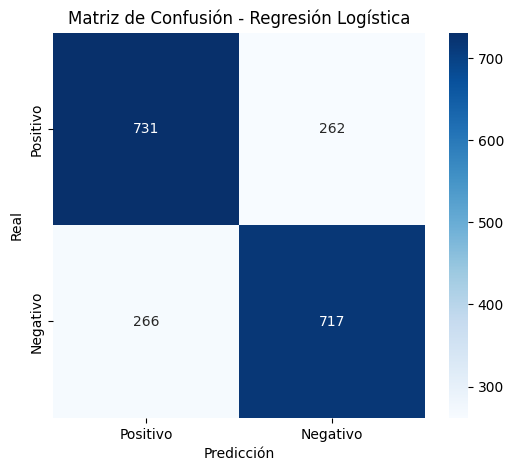

In [28]:
#Reorganizar la matriz y representarla visualmente
cm_visual = [[cm[1, 1], cm[1, 0]],
             [cm[0, 1], cm[0, 0]]]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_visual, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Positivo', 'Negativo'],
            yticklabels=['Positivo', 'Negativo'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

In [29]:
#Reporte de clasificación:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       983
           1       0.73      0.74      0.73       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976



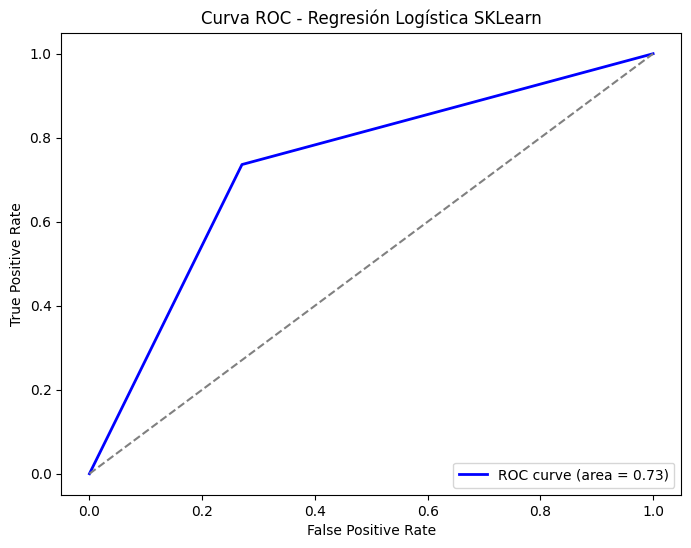

In [30]:
#Definir y representar curva ROC

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística SKLearn')
plt.legend(loc='lower right')
plt.show()